<a href="https://colab.research.google.com/github/jiukeem/deeplearning_from_scratch/blob/master/normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [3]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [4]:
x_train.shape, x_val.shape

((364, 30), (91, 30))

In [5]:
# normalization 
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [6]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.cost_history = []
    self.w_history = []
    
  def initialization(self, x):
    self.w = np.ones(x.shape[1]) # 이렇게 설정하면 (1, nx) 일지 (nx, 1) 일지 어떻게 알지?
    self.b = 0
    return self.w, self.b

  def sigmoid(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def forward_prop(self, x):
    z = np.sum(x * self.w) + self.b
    a = self.sigmoid(z)
    return a

  def calcul_loss(self, a, y):
    a = np.clip(a, 1e-10, 1-1e-10)
    loss = -(y * np.log(a) + (1 - y) * np.log(1 - a))
    return loss

  def backward_prop(self, x, y, a):
    dw = (a - y) * x
    db = (a - y) * 1 
    return dw, db

  def fit(self, x, y, epoches=100):
    self.w, self.b = self.initialization(x)
    for i in range(epoches):
      loss = 0
      index = np.random.permutation(np.arange(len(x)))
      for i in index:
        a = self.forward_prop(x[i])
        dw, db = self.backward_prop(x[i], y[i], a)
        self.w -= dw
        self.b -= db
        loss += self.calcul_loss(a, y[i])
        self.w_history.append(self.w.copy())
      self.cost_history.append(loss / x.shape[0])

  def predict(self, x): # 여기 x는 2차원 행렬로 들어온다
    a = [self.forward_prop(x_row) for x_row in x] # 이렇게 하면 각 row가 요소가 되는 듯?
    y_hat = [i > 0.5 for i in a]
    return y_hat
      
  def score(self, x, y):
    y_hat = self.predict(x)
    score = np.mean(y_hat == y)
    return score      

In [7]:
layer = SingleLayer()
layer.fit(x_train_all, y_train_all)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


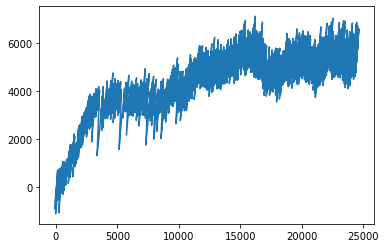

In [8]:
w2 = []
w3 = []
for w in layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.show()

# normalization 을 하지 않은 경우

In [9]:
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


0.9385964912280702

In [18]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

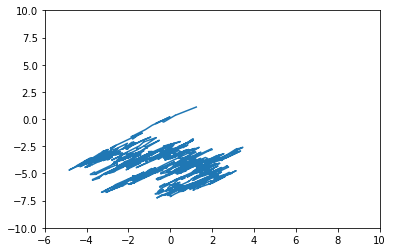

In [23]:
w2 = []
w3 = []
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2, w3)
plt.ylim(-10, 10)
plt.xlim(-6, 10)
plt.show()

In [20]:
x_val_scaled = (x_val - train_mean) / train_std
layer2.score(x_val_scaled, y_val)

0.945054945054945

In [21]:
x_test_scaled = (x_test - train_mean) / train_std
layer2.score(x_test_scaled, y_test)

0.9385964912280702